In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
def preprocess(df):
    df = df.select_dtypes(include=['float64'])
    df = df.dropna()
    df.corr(method ='pearson')
    correlation_feature = correlations(df,0.80)
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    return df

def correlations(df,threshold):
    col_correlation = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>=threshold: 
                colname = corr_matrix.columns[i]
                col_correlation.add(colname)
        if corr_matrix.columns[i] not in col_correlation:
            df.__delitem__(corr_matrix.columns[i])
    return col_correlation

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def _sse(df,clusters,centroids):
    _total = 0
    for center, idx_samples in zip(centroids, clusters):
        _sum = 0
        for idx, samples in enumerate(idx_samples):
            _sum += np.sum((df[samples]-center)**2)
        _total += _sum
    return _total

def create_clusters(df,k,centroids):
    clusters = [[] for _ in range(k)]
    for idx, row in enumerate(df):
        distances = [euclidean_distance(row, dot) for dot in centroids]
        closest_index = np.argmin(distances)
        clusters[closest_index].append(idx)
    return clusters

def update_centroids(df,k,clusters):
    centroids = np.zeros((k,df.shape[1]))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(df[cluster], axis=0)
        centroids[cluster_idx] = cluster_mean
    return centroids

def is_consistent(k,previous_centroid,centroids):
    distances = [euclidean_distance(previous_centroid[i], centroids[i]) for i in range(k)]
    return sum(distances) == 0

def plot(df,clusters,centroids):

    final_cluster = np.empty(len(df))
    for idx_cluster, cluster in enumerate(clusters):
        for idx_sample in cluster:
            final_cluster[idx_sample] = idx_cluster
    plt.scatter(df[:,0],df[:,1],c=final_cluster,cmap='brg')
    plt.scatter(centroids[:,0],centroids[:,1], marker="x", color='black',linewidth=2)
    print("The center of the clusters: ",centroids)

In [6]:
def clustering(df,k,plot_clusters):
    random_centroid_idx = np.random.choice(len(df),k,replace=False)
    centroids = [df[idx] for idx in random_centroid_idx]

    for _ in range(100):

        clusters = create_clusters(df,k,centroids)
          
        previous_centroids = centroids
        centroids = update_centroids(df,k,clusters)
        
        if is_consistent(k,previous_centroids, centroids):
            break
    if plot_clusters:
        return plot(df,clusters,centroids)
    else:
        return _sse(df,clusters,centroids)


In [10]:
def main():
    dataset = pd.read_csv("salju_train.csv")
    df = preprocess(dataset)
    y = []
    plot_parts = False
    for i in range(1,9):
        y_idx = clustering(df,i,plot_parts)
        y.append(y_idx)

    x = [1,2,3,4,5,6,7,8]

    plt.figure(figsize=(16,8))
    plt.plot(x, y, 'o-')
    plt.xlabel('k')
    plt.ylabel('Sum Square Error')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

    difference_k = [y[idx]-y[idx+1] for idx in range(len(y)-1)]
    get_k = np.argmax(difference_k)
    print("The optimal k of Elbow Method is: ",get_k+2)
    plot_parts = True
    plot_cluster = clustering(df,get_k+2,plot_parts)

  

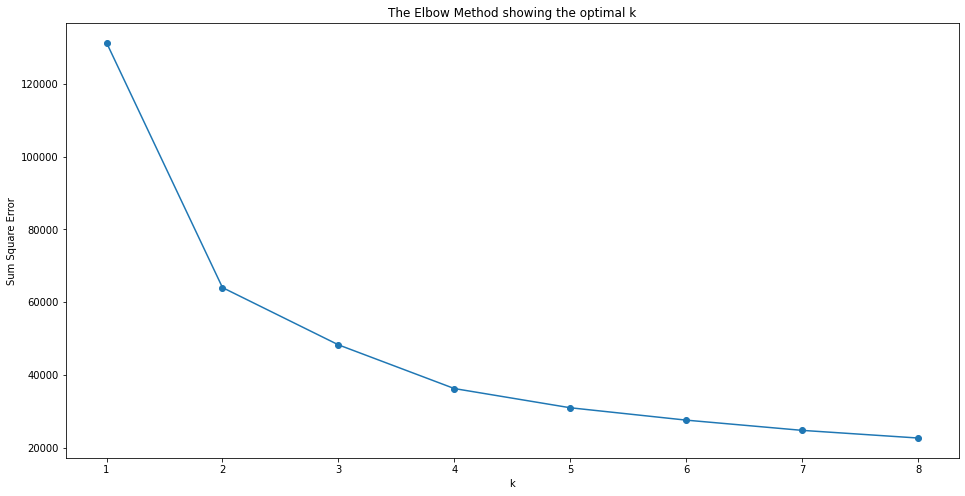

The optimal k of Elbow Method is:  2
The center of the clusters:  [[ 0.49205916 -0.73778002 -0.72238408]
 [-0.57860972  0.86755156  0.84944756]]


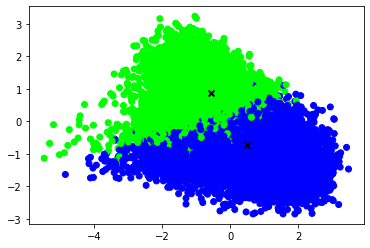

In [11]:
main()